In [ ]:
#Data Management
import pandas as pd
import numpy as np
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Data Analysis

In [ ]:
#Connection to Google chrome
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Connection to Google Drive and exploration of the data set

In [ ]:
#Load data
path = '/content/drive/MyDrive/BIA7042025/ToysWereUs.csv'
dataset = pd.read_csv(path)

In [ ]:
dataset.head(30)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    5 non-null      float64
 1   Month   60 non-null     object 
 2   Demand  60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


#Data preparation

In [ ]:
#remove NAN from Demand
dataset.dropna(subset=['Demand'], inplace=True)
#Convert demand to integer
dataset['Demand'] = dataset['Demand'].astype(int)
#dataset.head(30)
#Create for the column a nw series that repeats each 12 months, starting in 1 and finishing at 12 per year
dataset['Monthnum']=np.tile(np.arange(1, 13), len(dataset) // 12 + 1)[:len(dataset)]
dataset.head(30)

,Year,Month,Demand,Monthnum
0,2019.0,J,10,1
2,NaN,F,12,2
4,NaN,M,12,3
6,NaN,A,14,4
8,NaN,M,12,5
10,NaN,J,15,6
12,NaN,J,14,7
14,NaN,A,10,8
16,NaN,S,10,9
18,NaN,O,13,10


In [ ]:
#insert a new column calles Index from 0 to last record
dataset.insert(0,'Index', range(0, len(dataset)))
#Fill the year column with each year break
dataset['Year'] = dataset['Year'].fillna(method='ffill')
dataset.head(30)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 122
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Index     60 non-null     int64  
 1   Year      60 non-null     float64
 2   Month     60 non-null     object 
 3   Demand    60 non-null     int64  
 4   Monthnum  60 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.8+ KB


<ipython-input-175-37adbebb8b68>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset['Year'] = dataset['Year'].fillna(method='ffill')


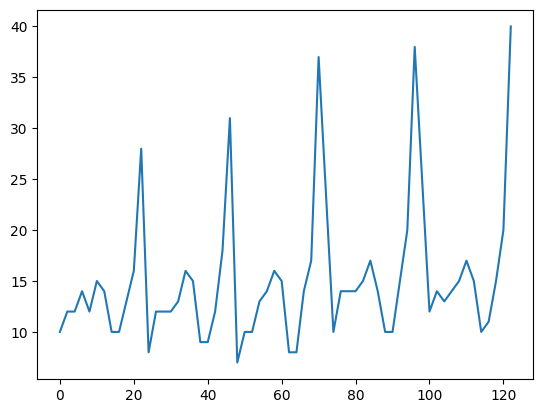

In [ ]:
#Plot the series of demand vs index
plt.plot(dataset['Demand'])
plt.show()

## Coefficients for each equation

In [ ]:
x=dataset['Index'].iloc[0:60]

y=dataset['Demand'].iloc[0:60]



In [ ]:
coeff=np.polyfit(x,y,2) #2 indicates quadratic Model

p=np.poly1d(coeff)

#predict value
y_pred=p(x)

#calculate R2

r2=1-np.sum((y-y_pred)**2)/np.sum((y-np.mean(y))**2)

#Coefficients for the quadratic equation
a, b, c = coeff

#generate smooth x values for the curve
x_fit=np.linspace(min(x), max(x), 60)
y_fit=a*x_fit**2 + b*x_fit + c

The equation is: y= 0.00x^2 + -0.03x + 13.16


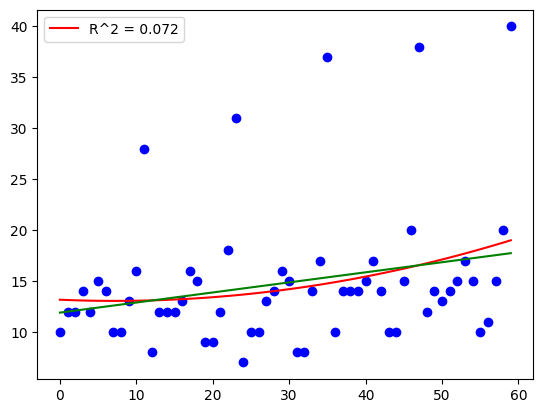

In [ ]:
#for the liner fit:
coeff_lin=np.polyfit(x, y, 1)

m, n =coeff_lin

print(f"The equation is: y= {a:.2f}x^2 + {b:.2f}x + {c:.2f}")
plt.scatter(x, y, color='blue') #original Data Points
plt.plot(x_fit, y_fit, color='red', label=f'R^2 = {r2:.3F}') #ploting the nonlinear eq

plt.plot(x, m*x +n, color='green') #ploting the liner eq.
#Line for the best fit on the quadratic
plt.legend()
plt.show()

##Create a prediction with te quadratic equation

In [ ]:
dataset['PredictedLine']=np.polyval(coeff, dataset['Index'])
dataset.head(60)

,Index,Year,Month,Demand,Monthnum,PredictedLine
0,0,2019.0,J,10,1,13.163855
2,1,2019.0,F,12,2,13.134049
4,2,2019.0,M,12,3,13.108683
6,3,2019.0,A,14,4,13.087757
8,4,2019.0,M,12,5,13.071270
10,5,2019.0,J,15,6,13.059223
12,6,2019.0,J,14,7,13.051615
14,7,2019.0,A,10,8,13.048447
16,8,2019.0,S,10,9,13.049719
18,9,2019.0,O,13,10,13.055431


In [ ]:
#Deviation of the demand vs the predicted line
dataset['Deviation']=dataset['Demand']/dataset['PredictedLine']
dataset.head(60)


,Index,Year,Month,Demand,Monthnum,PredictedLine,Deviation
0,0,2019.0,J,10,1,13.163855,0.759656
2,1,2019.0,F,12,2,13.134049,0.913656
4,2,2019.0,M,12,3,13.108683,0.915424
6,3,2019.0,A,14,4,13.087757,1.069702
8,4,2019.0,M,12,5,13.071270,0.918044
10,5,2019.0,J,15,6,13.059223,1.148614
12,6,2019.0,J,14,7,13.051615,1.072664
14,7,2019.0,A,10,8,13.048447,0.766375
16,8,2019.0,S,10,9,13.049719,0.766300
18,9,2019.0,O,13,10,13.055431,0.995754


##Calculation of Seasonality Indexes

In [ ]:
averagedev=dataset.groupby('Monthnum')['Deviation'].mean()
averagedev


,Deviation
Monthnum,
1,0.654159
2,0.862955
3,0.846910
4,0.927731
5,0.945966
6,1.108216
7,0.996718
8,0.636140
9,0.643096


In [ ]:
dataset.head()
dataset.tail(12)

,Index,Year,Month,Demand,Monthnum,PredictedLine,Deviation
100,48,2023.0,J,12,1,16.741106,0.716799
102,49,2023.0,F,14,2,16.924404,0.827208
104,50,2023.0,M,13,3,17.112141,0.759695
106,51,2023.0,A,14,4,17.304318,0.809047
108,52,2023.0,M,15,5,17.500934,0.857097
110,53,2023.0,J,17,6,17.701990,0.960344
112,54,2023.0,J,15,7,17.907486,0.837639
114,55,2023.0,A,10,8,18.117422,0.551955
116,56,2023.0,S,11,9,18.331797,0.600050
118,57,2023.0,O,15,10,18.550612,0.808599


##Projection for Forecast

In [ ]:
#Determine the last month in the index
lastmonth=dataset['Index'].iloc[-1]
#Insert 12 month rows to Index from the last value
new_index=pd.DataFrame({'Index': range(lastmonth+1, lastmonth+13)})
dataset=pd.concat([dataset, new_index], ignore_index=True)
dataset.tail(24)


,Index,Year,Month,Demand,Monthnum,PredictedLine,Deviation
48,48,2023.0,J,12.0,1.0,16.741106,0.716799
49,49,2023.0,F,14.0,2.0,16.924404,0.827208
50,50,2023.0,M,13.0,3.0,17.112141,0.759695
51,51,2023.0,A,14.0,4.0,17.304318,0.809047
52,52,2023.0,M,15.0,5.0,17.500934,0.857097
53,53,2023.0,J,17.0,6.0,17.701990,0.960344
54,54,2023.0,J,15.0,7.0,17.907486,0.837639
55,55,2023.0,A,10.0,8.0,18.117422,0.551955
56,56,2023.0,S,11.0,9.0,18.331797,0.600050
57,57,2023.0,O,15.0,10.0,18.550612,0.808599


In [ ]:
#Calculate the new predictive line to the last index
dataset['PredictedLine']=np.polyval(coeff, dataset['Index'])
dataset.tail(24)


,Index,Year,Month,Demand,Monthnum,PredictedLine,Deviation
48,48,2023.0,J,12.0,1.0,16.741106,0.716799
49,49,2023.0,F,14.0,2.0,16.924404,0.827208
50,50,2023.0,M,13.0,3.0,17.112141,0.759695
51,51,2023.0,A,14.0,4.0,17.304318,0.809047
52,52,2023.0,M,15.0,5.0,17.500934,0.857097
53,53,2023.0,J,17.0,6.0,17.701990,0.960344
54,54,2023.0,J,15.0,7.0,17.907486,0.837639
55,55,2023.0,A,10.0,8.0,18.117422,0.551955
56,56,2023.0,S,11.0,9.0,18.331797,0.600050
57,57,2023.0,O,15.0,10.0,18.550612,0.808599


In [ ]:
#Extend the Monthnum 12 more rows
dataset['Monthnum']=np.tile(np.arange(1, 13), len(dataset) // 12 + 1)[:len(dataset)]
dataset.tail(24)


,Index,Year,Month,Demand,Monthnum,PredictedLine,Deviation
48,48,2023.0,J,12.0,1,16.741106,0.716799
49,49,2023.0,F,14.0,2,16.924404,0.827208
50,50,2023.0,M,13.0,3,17.112141,0.759695
51,51,2023.0,A,14.0,4,17.304318,0.809047
52,52,2023.0,M,15.0,5,17.500934,0.857097
53,53,2023.0,J,17.0,6,17.701990,0.960344
54,54,2023.0,J,15.0,7,17.907486,0.837639
55,55,2023.0,A,10.0,8,18.117422,0.551955
56,56,2023.0,S,11.0,9,18.331797,0.600050
57,57,2023.0,O,15.0,10,18.550612,0.808599


In [ ]:
#Include the year 2024 repeated on the column 'Year' After the last value
dataset['Year']=dataset['Year'].fillna(method='ffill')
dataset.tail(24)


<ipython-input-187-7a020655b7ac>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset['Year']=dataset['Year'].fillna(method='ffill')


,Index,Year,Month,Demand,Monthnum,PredictedLine,Deviation
48,48,2023.0,J,12.0,1,16.741106,0.716799
49,49,2023.0,F,14.0,2,16.924404,0.827208
50,50,2023.0,M,13.0,3,17.112141,0.759695
51,51,2023.0,A,14.0,4,17.304318,0.809047
52,52,2023.0,M,15.0,5,17.500934,0.857097
53,53,2023.0,J,17.0,6,17.701990,0.960344
54,54,2023.0,J,15.0,7,17.907486,0.837639
55,55,2023.0,A,10.0,8,18.117422,0.551955
56,56,2023.0,S,11.0,9,18.331797,0.600050
57,57,2023.0,O,15.0,10,18.550612,0.808599


#Calculate Forecast

In [ ]:
#calculate the forecast
dataset['Forecast']=dataset['PredictedLine']*dataset.apply(lambda row: averagedev[row['Monthnum']], axis=1)
dataset.tail(24)

,Index,Year,Month,Demand,Monthnum,PredictedLine,Deviation,Forecast
48,48,2023.0,J,12.0,1,16.741106,0.716799,10.951341
49,49,2023.0,F,14.0,2,16.924404,0.827208,14.605003
50,50,2023.0,M,13.0,3,17.112141,0.759695,14.492440
51,51,2023.0,A,14.0,4,17.304318,0.809047,16.053757
52,52,2023.0,M,15.0,5,17.500934,0.857097,16.555294
53,53,2023.0,J,17.0,6,17.701990,0.960344,19.617624
54,54,2023.0,J,15.0,7,17.907486,0.837639,17.848720
55,55,2023.0,A,10.0,8,18.117422,0.551955,11.525209
56,56,2023.0,S,11.0,9,18.331797,0.600050,11.789099
57,57,2023.0,O,15.0,10,18.550612,0.808599,17.007223


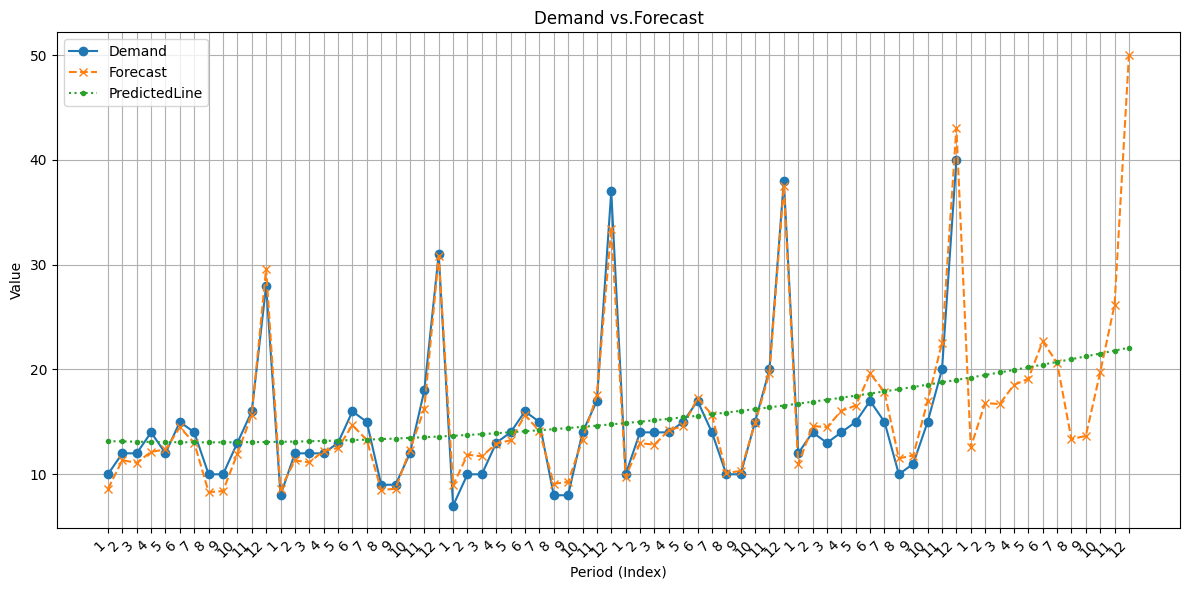

In [ ]:
#Plotting the data
plt.figure(figsize=(12,6)) #Adjust figure size if needed

#Plot demand, forecast, and baseline
plt.plot(dataset['Index'], dataset['Demand'], marker='o',label='Demand')
plt.plot(dataset['Index'], dataset['Forecast'], marker='x', label='Forecast', linestyle='--') #changed label,added linestyle
plt.plot(dataset['Index'], dataset['PredictedLine'], marker='.', label='PredictedLine', linestyle=':') #Added baseline plot

#Customize the plot
plt.title('Demand vs.Forecast')
plt.xlabel('Period (Index)')
plt.ylabel('Value')
plt.xticks(dataset['Index'], dataset['Monthnum'], rotation=45, ha='right') #Set x-axis ticks to quarters
plt.legend()
plt.grid(True)

plt.tight_layout() #Adjust layout for better spacing
plt.show()


In [ ]:
df_subset=dataset.iloc[0:59]
mape=(abs(df_subset['Demand']-df_subset['Forecast'])/df_subset['Demand']).mean()
print(f"MAPE = {mape*100:.2f}%")

MAPE = 8.01%


###Linear Method

In [ ]:
#Import required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
x_linear = dataset['Index'].iloc[0:60]
y_linear = dataset['Demand'].iloc[0:60]

In [ ]:
coeff_linear = np.polyfit(x_linear, y_linear, 1)


In [ ]:
y_pred_linear=np.polyval(coeff_linear, x_linear)

In [ ]:
#Add predictions to dataframe
dataset['LinearPrediction']=np.polyval(coeff_linear, dataset['Index'])

In [ ]:
#Compute Deviation for linear model
dataset['Deviation_Linear'] = dataset['Demand'] / dataset['LinearPrediction']

In [ ]:
avg_dev_linear = dataset.iloc[0:60].groupby('Monthnum')['Deviation_Linear'].mean()

In [ ]:
dataset['Forecast_Linear'] = dataset['LinearPrediction'] * dataset['Monthnum'].apply(lambda m: avg_dev_linear[m] if m in avg_dev_linear else 0)

In [ ]:
#Compute MAPE using the same 59 records
df_Linear_subset=dataset.iloc[0:59]
mape_linear=(abs(df_Linear_subset['Demand']-df_Linear_subset['Forecast_Linear'])/df_Linear_subset['Demand']).mean()
print(f"The MAPE for the Linear model is: {mape_linear*100:.2f}%")


The MAPE for the Linear model is: 8.31%


###The Graph comparison of the nonlinear (1) and linear(2)

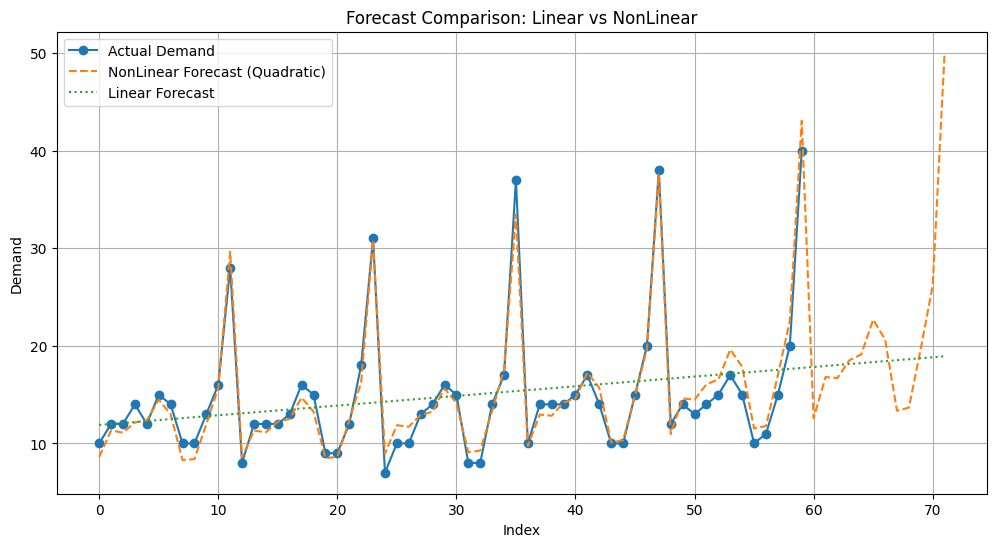

In [ ]:
#Plot both predictions
plt.figure(figsize=(12,6))
plt.plot(dataset['Index'], dataset['Demand'], label='Actual Demand', marker='o')
plt.plot(dataset['Index'], dataset['Forecast'],label='NonLinear Forecast (Quadratic)', linestyle='--')
plt.plot(dataset['Index'], dataset['LinearPrediction'], label='Linear Forecast', linestyle=':')
plt.title("Forecast Comparison: Linear vs NonLinear")
plt.xlabel("Index")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)
plt.show()